In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col = 'date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [10]:
low_data = df['value'].quantile(0.025)
high_data = df['value'].quantile(0.975)

df = df[ (df['value']>=low_data) & (df['value']<=high_data) ]

In [11]:
def draw_line_plot(df):
        fig, ax = plt.subplots(figsize=(12,6))
        ax.plot(df.index, df['value'], color='r', linewidth = 1 )
        ax.set_title ("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
        ax.set_xlabel('Date')
        ax.set_ylabel('Page Views')

        plt.tight_layout()
        plt.show()

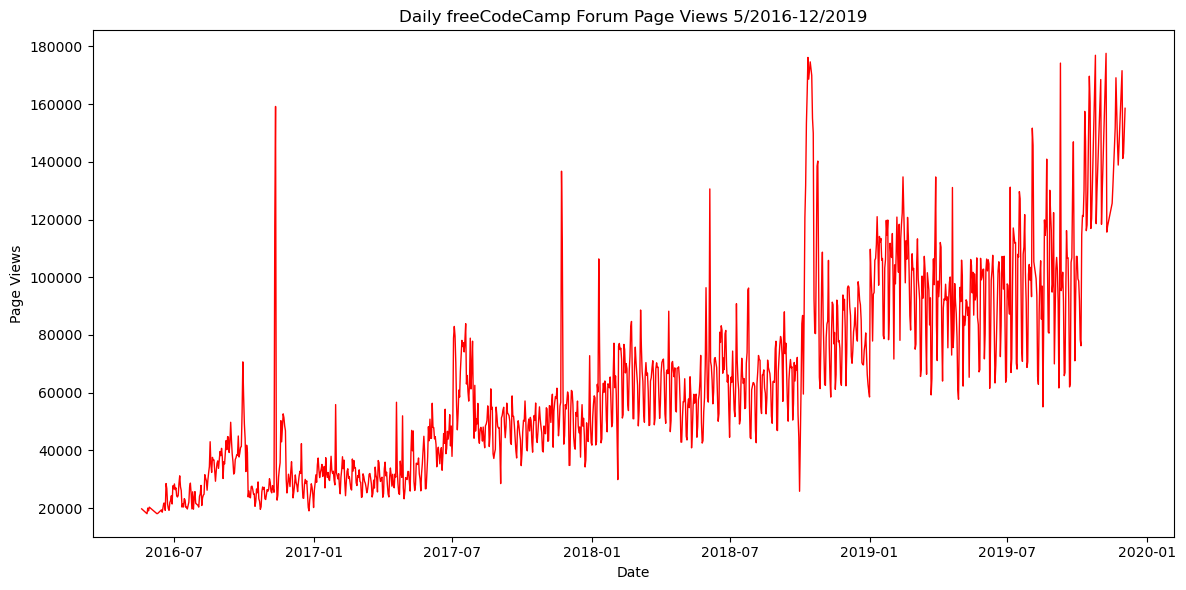

In [12]:
draw_line_plot(df)

In [13]:
def draw_bar_plot():

    df['year'] = df.index.year
    df['month'] = df.index.month

    month_colors = sns.color_palette("tab10", 12)

    plt.figure(figsize=(8,7))
    sns.barplot(data=df, x='year', y='value', hue='month', palette=month_colors)

    plt.xlabel("Month")
    plt.ylabel("Average Page Views")
    plt.title("Monthly Page Views for Multiple Years")
    

    # Show the plot
    plt.tight_layout()
    plt.show()
    

    

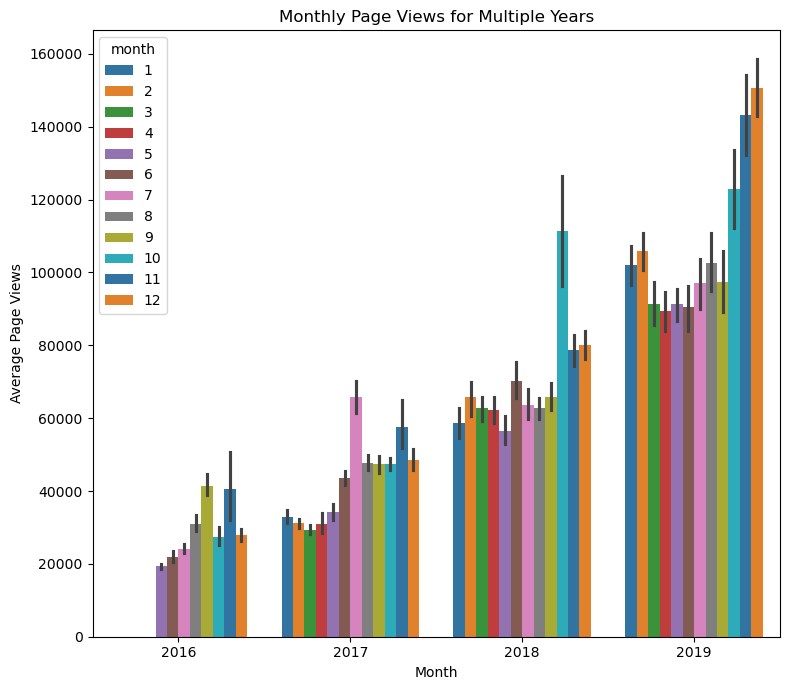

In [14]:
draw_bar_plot()

In [19]:
import calendar

In [ ]:
def draw_box_plot():
    df['year'] = df.index.year
    df['month'] = df.index.month

    df['month_name'] =  df.index.strftime('%b')

    fig2, axes= plt.subplots(1, 2, figsize=(14,7))

    sns.boxplot(ax=axes[0], x='year', y='value',hue='year' , data= df, palette='Set2')
    axes[0].set_title("Year-wise Box Plot (trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(ax=axes[1], x='month', y='value',hue='month', data=df, palette='Set3') #hue is kept just to make 
    axes[1].set_title("Month-wise Box Plot (trend)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    plt.tight_layout()
    plt.show()

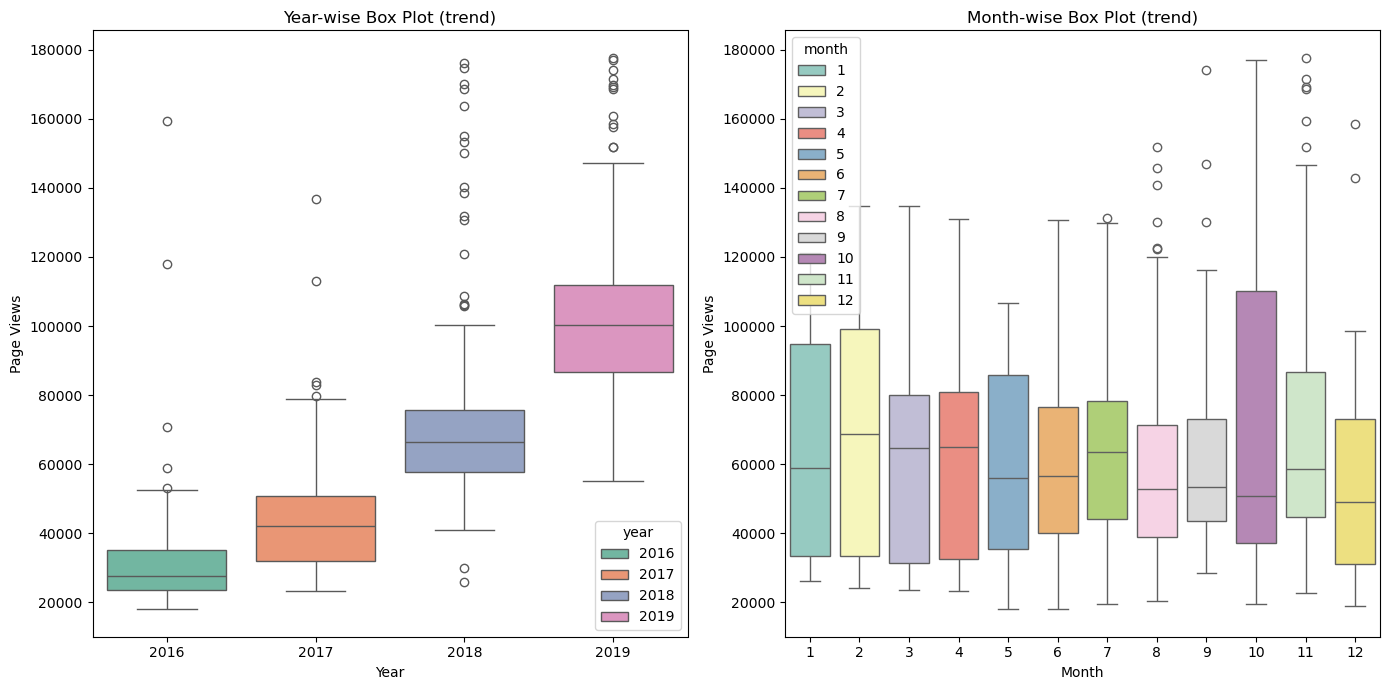

In [38]:
draw_box_plot()